In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma, kv
from numpy import matlib

import torch
import mgplvm as mgp
import pickle
import time
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression, Ridge
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
plt.rcParams['font.size'] = 10
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
np.random.seed(0)
torch.manual_seed(0)
device = mgp.utils.get_device() # use GPU if available, otherwise CPU
print(device)

from scipy.stats import poisson
from synthetic_data import *

import sys
import io

cuda


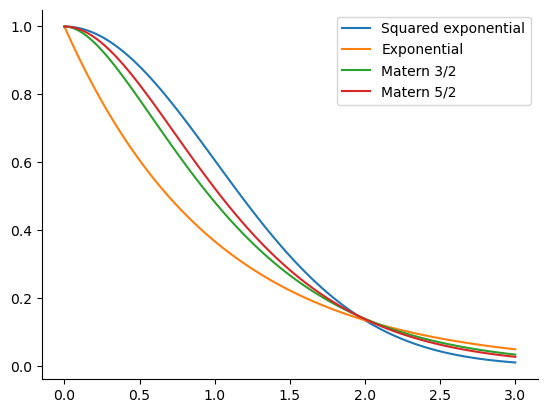

In [2]:
r = np.linspace(0, 3, 100)
l = 1.0
# nus = np.array([0.5, 1.5, 2.5])
plt.plot(r, squared_exponential_kernel(r, l), label='Squared exponential')
plt.plot(r, exponential_kernel(r, l), label='Exponential')
plt.plot(r, matern_3_2_kernel(r, l), label='Matern 3/2')
plt.plot(r, matern_5_2_kernel(r, l), label='Matern 5/2')
# for nu in nus:
#     plt.plot(r, matern_kernel(r, l, nu), label='Matern, nu={}'.format(nu))
plt.legend()
plt.show()

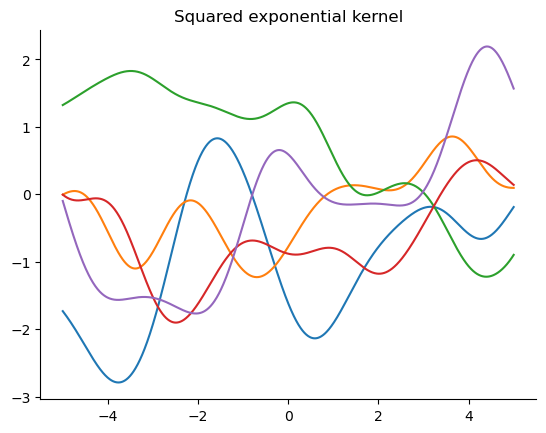

In [3]:
x_axis = np.linspace(-5, 5, 1000)
l = 1.0

K = squared_exponential_kernel(x_axis[:, None] - x_axis[None, :], l)
num_funcs = 5
plt.plot(x_axis, np.random.multivariate_normal(mean=np.zeros(len(x_axis)), cov=K, size=num_funcs).T)
plt.title('Squared exponential kernel')
plt.show()


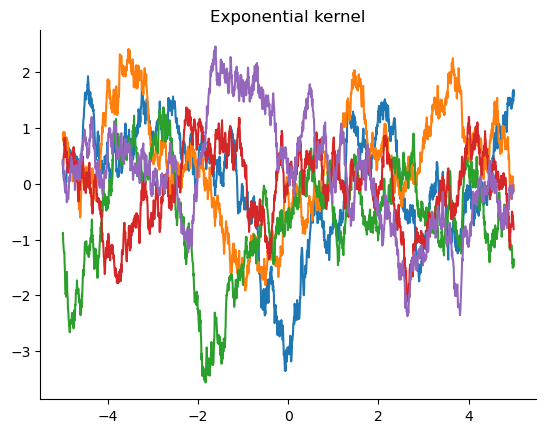

In [4]:
x_axis = np.linspace(-5, 5, 2000)
l = 1.0

K = exponential_kernel(abs(x_axis[:, None] - x_axis[None, :]), 1.0)
num_funcs = 5
plt.plot(x_axis, np.random.multivariate_normal(mean=np.zeros(len(x_axis)), cov=K, size=num_funcs).T)
plt.title('Exponential kernel')
plt.show()

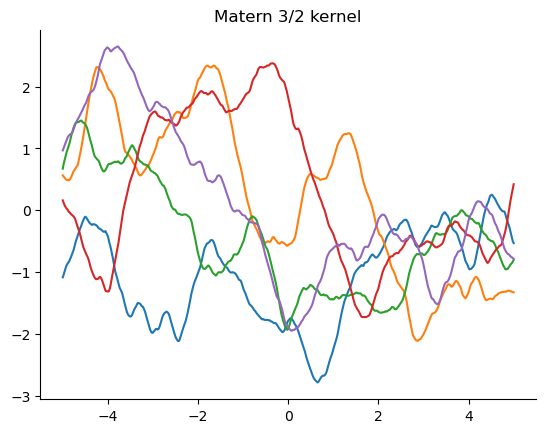

In [5]:
x_axis = np.linspace(-5, 5, 2000)
l = 1.0

K = matern_3_2_kernel(abs(x_axis[:, None] - x_axis[None, :]), 1.0)
num_funcs = 5
plt.plot(x_axis, np.random.multivariate_normal(mean=np.zeros(len(x_axis)), cov=K, size=num_funcs).T)
plt.title('Matern 3/2 kernel')
plt.show()

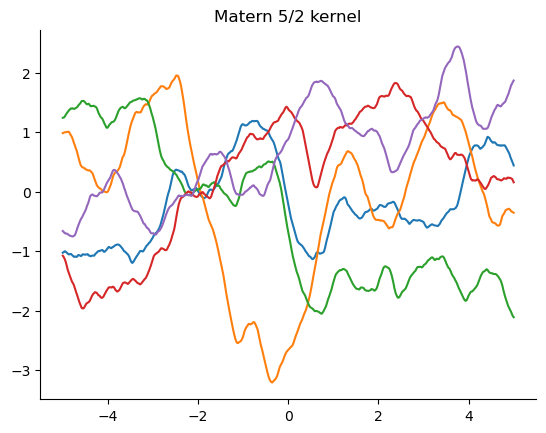

In [6]:
x_axis = np.linspace(-5, 5, 2000)
l = 1.0

K = matern_3_2_kernel(abs(x_axis[:, None] - x_axis[None, :]), 1.0)
num_funcs = 5
plt.plot(x_axis, np.random.multivariate_normal(mean=np.zeros(len(x_axis)), cov=K, size=num_funcs).T)
plt.title('Matern 5/2 kernel')
plt.show()

# Task

In [61]:
# s = SyntheticData(c_var=10, D=5, stop=10, ntrials=1, N=200, d=0, dt=0.02, noise='gaussian')
s = SyntheticData(c_var=10, D=3, stop=40, ntrials=1, N=200, d=15, dt=0.02)

# Y = s.get_Y(kernel='squared_exponential', s=.5, link=None)
# print(np.shape(Y))

# # Y2 = s.get_Y(kernel='squared_exponential', noise='gaussian', s=0.1)
# # print(np.shape(Y))

# Y_e = s.get_Y(kernel='exponential', s=.5, link=None)
# print(np.shape(Y_e))

# Y_matern_3_2 = s.get_Y(kernel='matern_3_2', s=.1, link=None)
# print(np.shape(Y_matern_3_2))

# Y_matern_5_2 = s.get_Y(kernel='matern_5_2', s=.1, link=None)
# print(np.shape(Y_matern_5_2))

Y = s.get_Y(kernel='squared_exponential')
print(np.shape(Y))

# Y2 = s.get_Y(kernel='squared_exponential', noise='gaussian', s=0.1)
# print(np.shape(Y))

Y_e = s.get_Y(kernel='exponential')
print(np.shape(Y_e))

Y_matern_3_2 = s.get_Y(kernel='matern_3_2')
print(np.shape(Y_matern_3_2))

Y_matern_5_2 = s.get_Y(kernel='matern_5_2')
print(np.shape(Y_matern_5_2))

(1, 200, 2000)
(1, 200, 2000)
(1, 200, 2000)
(1, 200, 2000)


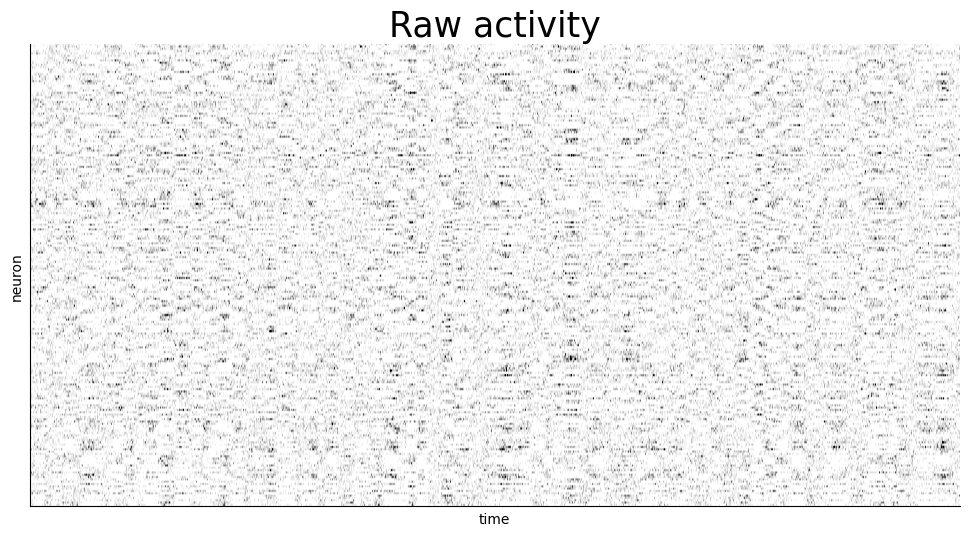

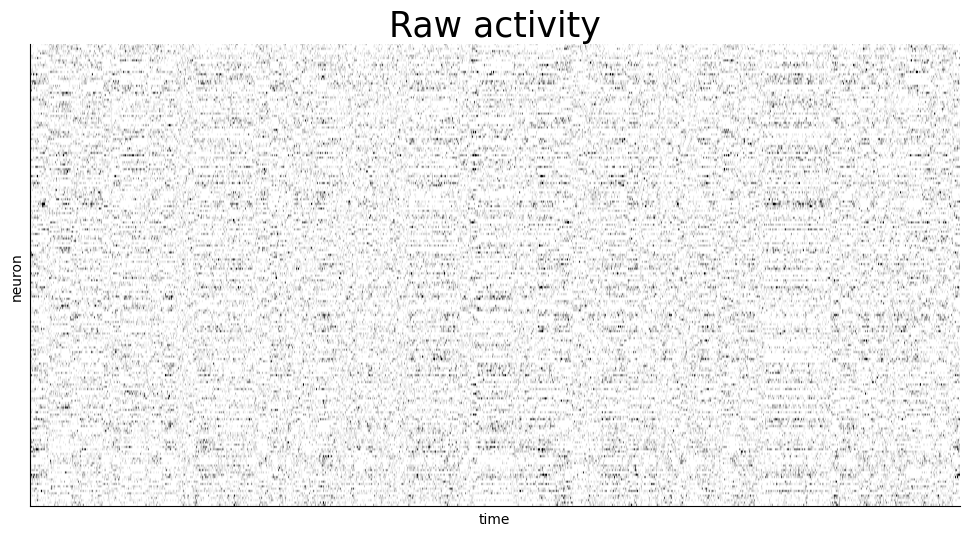

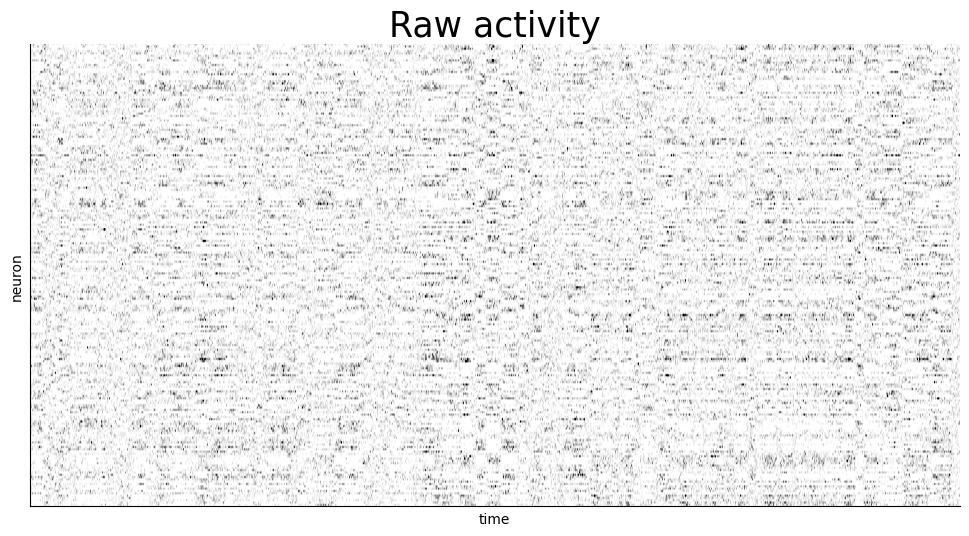

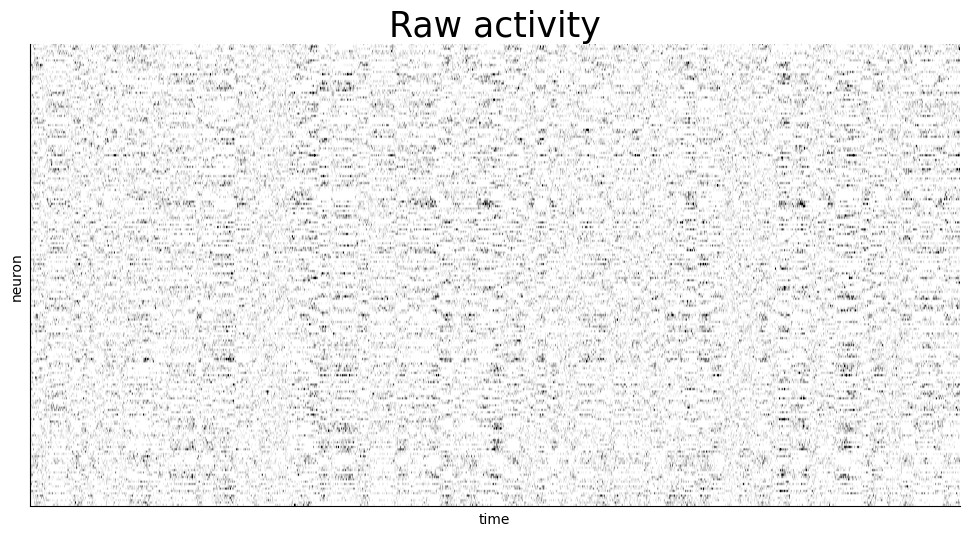

In [62]:
s.plot_Y()

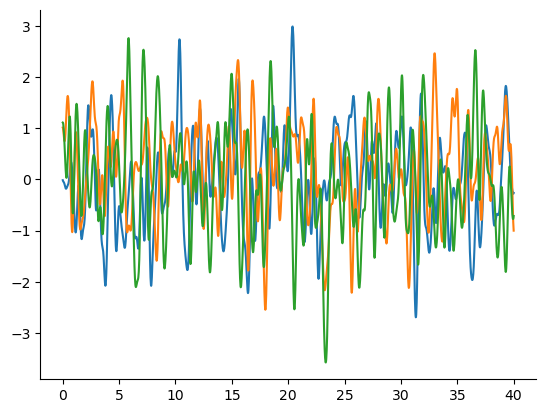

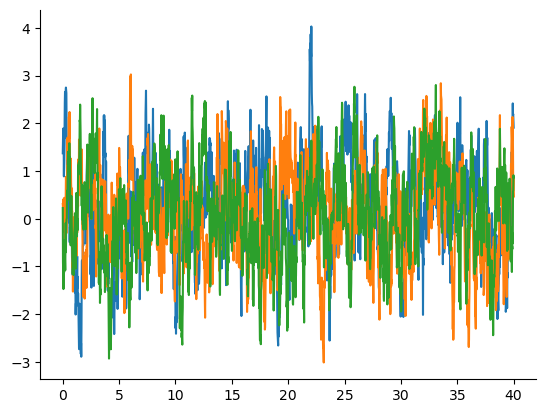

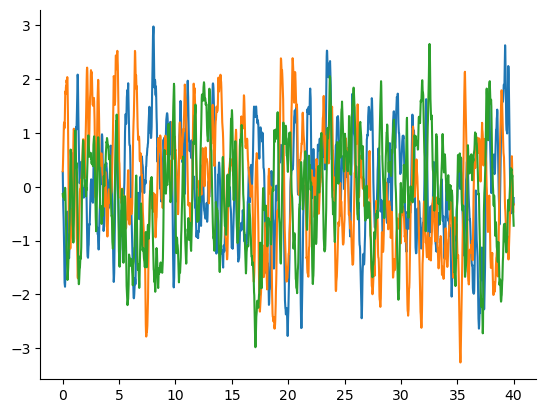

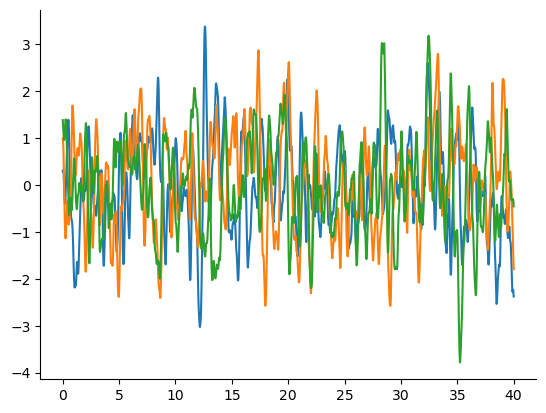

In [63]:
s.plot_X()

In [64]:
rates = np.zeros(s.N)
for i in range(s.N):
    rates[i] = np.sum(np.abs(s.Ys[0][0,i])) / s.stop
print(np.average(rates))
print(np.std(rates))

16.61675
2.513439016069417


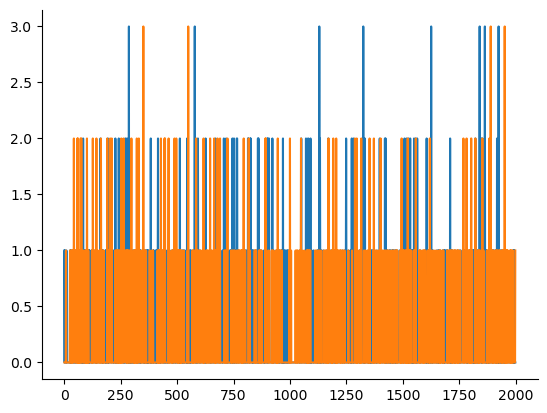

In [65]:
plt.plot(s.Ys[0][0,0])
# plt.plot(s.Ys[0][0,1])
plt.plot(s.Ys[1][0,0])
plt.show()

In [12]:
# np.random.seed(0)
# torch.manual_seed(0)
# mod1 = s.train(0, learn_scale=None, ard=False, nu=True, rho=1, lrate=7.5e-2, max_steps=1001, n_mc=10, print_every=100, d_fit=2, prior_ell_factor=0.8, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_squared_exponential, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': True, 'fixed_d': False})

# # np.random.seed(0)
# # torch.manual_seed(0)
# # mod2 = s.train(0, nu=True, learn_scale=None, ard=False, rho=1, lrate=7.5e-2, max_steps=1001, n_mc=10, print_every=100, d_fit=2, prior_ell_factor=0.8, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_exponential, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': True, 'fixed_d': False})

# # # np.random.seed(0)
# # # torch.manual_seed(0)
# # # mod3 = s.train(0, nu=True, rho=1, lrate=7.5e-2, max_steps=501, n_mc=10, print_every=100, d_fit=10, prior_ell_factor=0.8, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_matern_3_2, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': True, 'fixed_d': False})

# # # np.random.seed(0)
# # # torch.manual_seed(0)
# # # mod4 = s.train(0, nu=True, rho=1, lrate=7.5e-2, max_steps=501, n_mc=10, print_every=100, d_fit=10, prior_ell_factor=0.8, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_rational_quadratic_1, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': True, 'fixed_d': False})

In [13]:
# np.random.seed(0)
# torch.manual_seed(0)
# mod2 = s.train(0, nu=True, rho=1, lrate=7.5e-2, max_steps=2001, n_mc=10, print_every=100, d_fit=10, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_exponential, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': False, 'fixed_d': False, 'binsize': 1})

In [14]:
# xs = s.Xs[0][0].T # true latents
# print(np.shape(xs))
# xs = xs - np.mean(xs, axis = 0, keepdims = True) # mean subtract

# #### plot latents ####
# lim = 100
# plt.figure()
# plt.plot(xs[:lim, 0], xs[:lim, 1], 'k-', label='true') # plot true latents
# mods = [mod1, mod2] # models to plot
# for i, mod in enumerate(mods):
#     lats = mods[i].lat_dist.lat_mu.detach().cpu().numpy()[0, ...] # extract model latents
#     dim_scales = mods[i].obs.dim_scale.detach().cpu().numpy().flatten() # latent scales
#     inds = np.argsort(-dim_scales)[:2] # pick the two most informative dimensions
#     lats = lats[..., inds] # extract corresponding latents
#     lats = lats - np.mean(lats, axis = 0, keepdims = True) # mean subtract

#     #fit xs = mus @ T --> T = (mus' * mus)^(-1) * mus' * xs
#     T = np.linalg.inv(lats.T @ lats) @ lats.T @ xs # linear regression
#     lats = lats @ T  #predicted values

#     plt.plot(lats[:lim, 0], lats[:lim, 1], label='{}'.format(i)) # plot inferred latents

# plt.legend()
# plt.show()
# plt.close()

In [15]:
# kernels = [mgp.rdist.prior_kernels.k_1_2_squared_exponential, mgp.rdist.prior_kernels.k_1_2_exponential, mgp.rdist.prior_kernels.k_1_2_matern_3_2, mgp.rdist.prior_kernels.k_1_2_matern_5_2]
# names = ['SE', 'OU', 'M_3_2', 'M_5_2']
# for data_ind in range(2,3):
#     file_path = "{}_data.txt".format(names[data_ind])
#     for kernel in range(3):
#         MSEs = []
#         losses = []
#         LLs = []
#         for i in range(3): # trials
#             # Capture the function's output
#             output_buffer = io.StringIO()
#             sys.stdout = output_buffer

#             np.random.seed(i)
#             torch.manual_seed(i)
#             LL, MSE, final_loss = s.cross_validate(data_ind, rho=.1, prior_ell_factor=0.8, lrate=7.5e-2, max_steps=2501, prior_fourier_func=kernels[kernel], likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': False, 'fixed_d': False})
#             MSEs.append(MSE)
#             losses.append(final_loss)
#             LLs.append(LL)
#             print(LL, MSE)
#             print('seed {} done'.format(i))
#             print('', end='\n\n')

#             # Reset the standard output
#             sys.stdout = sys.__stdout__
#             # Get the captured output as a string
#             captured_output = output_buffer.getvalue()
#             # Open the file in write mode and write the captured output
#             with open(file_path, 'a') as file:
#                 file.write(captured_output)
        
#         with open(file_path, 'a') as file:
#             file.write('\n {} kernel done \n \n \n'.format(names[kernel]))

#         with open('results.txt', 'a') as file:
#             file.write('{} Data {} kernel - MSE: {} +/- {} - Loss: {} +/- {}, LL = {} +/- {} \n'.format(names[data_ind], names[kernel], np.mean(MSEs), np.std(MSEs), np.mean(losses), np.std(losses), np.mean(LLs), np.std(LLs)))
#             file.write('MSEs' + str(MSEs) + '\n')
#             file.write('losses' + str(losses) + '\n')
#             file.write('LLs' + str(LLs) + '\n')
#             file.write('\n')

iter   0 | elbo -0.900 | kl  0.000 | loss  0.900 | |mu| 0.051 | sig 1.000 | prior_ell 8.000 |scale 0.007 | 
iter: 0 time: 0s log scales: [-4.1 -4.1 -4.3 -5.3 -5.5 -5.5 -5.6 -5.6 -5.6 -5.6]


iter  50 | elbo -0.771 | kl  0.017 | loss  0.781 | |mu| 0.794 | sig 0.999 | prior_ell 8.285 |scale 0.010 | 
iter 100 | elbo -0.736 | kl  0.009 | loss  0.745 | |mu| 0.607 | sig 1.000 | prior_ell 8.534 |scale 0.017 | 
iter: 100 time: 6s log scales: [-3.  -3.  -3.5 -4.9 -5.1 -5.2 -5.2 -5.2 -5.3 -5.3]
iter 150 | elbo -0.691 | kl  0.011 | loss  0.701 | |mu| 0.584 | sig 1.000 | prior_ell 8.577 |scale 0.039 | 
iter 200 | elbo -0.670 | kl  0.011 | loss  0.680 | |mu| 0.498 | sig 1.000 | prior_ell 8.492 |scale 0.075 | 
iter: 200 time: 12s log scales: [-1.3 -1.5 -1.6 -4.9 -5.1 -5.2 -5.2 -5.3 -5.3 -5.3]
iter 250 | elbo -0.658 | kl  0.011 | loss  0.669 | |mu| 0.484 | sig 1.000 | prior_ell 8.367 |scale 0.112 | 
iter 300 | elbo -0.656 | kl  0.012 | loss  0.668 | |mu| 0.474 | sig 1.000 | prior_ell 8.247 |scale 0.142 | 
iter: 300 time: 18s log scales: [-0.7 -0.8 -0.8 -4.9 -5.2 -5.2 -5.3 -5.3 -5.3 -5.4]
iter 350 | elbo -0.656 | kl  0.012 | loss  0.668 | |mu| 0.466 | sig 1.000 | prior_ell 8.153 |scale 0.

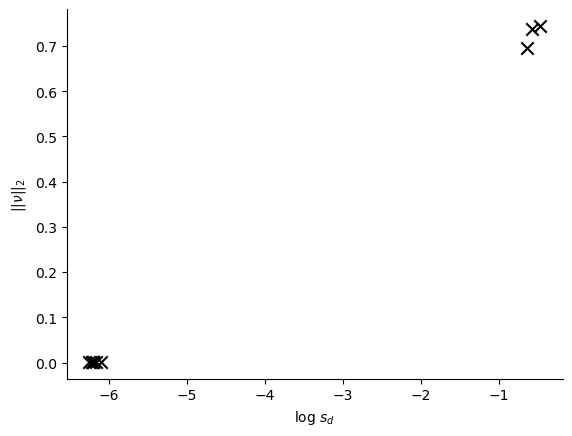

plotting informative and discarded dimensions


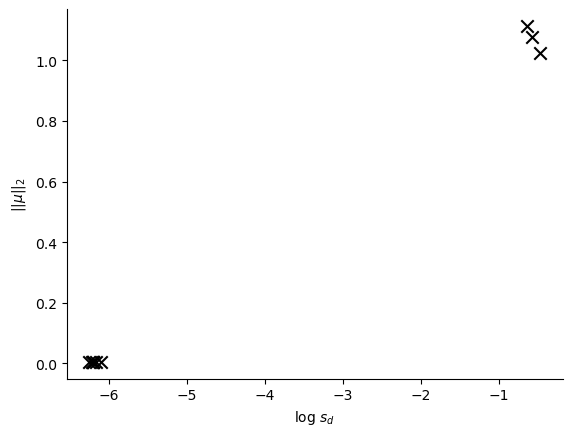

learned timescales (ms): [120 115 114 169 167 167 166 167 167 166]
-0.668015853658901 0.01443097917121691


In [66]:
np.random.seed(0)
torch.manual_seed(0)
LL, MSE, final_loss, lat_traj, Ytest, Ypred, mod, mu = s.cross_validate(1, nu=None, d_fit=10, lrate=5e-2, max_steps=2001, rho=.1, prior_ell_factor=0.8, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*0, 'fixed_c': True, 'fixed_d': False}, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_exponential, ret_Y=True)
print(LL, MSE)

iter   0 | elbo -0.900 | kl  0.000 | loss  0.900 | |mu| 0.051 | sig 1.000 | prior_ell 8.000 |scale 0.007 | 
iter: 0 time: 0s log scales: [-4.1 -4.1 -4.3 -5.3 -5.5 -5.5 -5.6 -5.6 -5.6 -5.6]


iter  50 | elbo -0.771 | kl  0.016 | loss  0.780 | |mu| 0.764 | sig 0.999 | prior_ell 8.261 |scale 0.009 | 
iter 100 | elbo -0.736 | kl  0.010 | loss  0.744 | |mu| 0.600 | sig 1.000 | prior_ell 8.495 |scale 0.017 | 
iter: 100 time: 7s log scales: [-3.  -3.  -3.5 -4.9 -5.1 -5.2 -5.2 -5.2 -5.3 -5.3]
iter 150 | elbo -0.703 | kl  0.007 | loss  0.709 | |mu| 0.469 | sig 1.000 | prior_ell 8.313 |scale 0.034 | 
iter 200 | elbo -0.685 | kl  0.006 | loss  0.691 | |mu| 0.387 | sig 1.000 | prior_ell 7.797 |scale 0.063 | 
iter: 200 time: 13s log scales: [-1.4 -1.7 -1.8 -4.4 -5.2 -5.2 -5.2 -5.3 -5.3 -5.3]
iter 250 | elbo -0.668 | kl  0.007 | loss  0.675 | |mu| 0.371 | sig 1.000 | prior_ell 7.177 |scale 0.098 | 
iter 300 | elbo -0.663 | kl  0.009 | loss  0.671 | |mu| 0.372 | sig 1.000 | prior_ell 6.804 |scale 0.125 | 
iter: 300 time: 19s log scales: [-0.8 -0.9 -1.  -3.6 -5.2 -5.3 -5.3 -5.3 -5.4 -5.4]
iter 350 | elbo -0.661 | kl  0.009 | loss  0.670 | |mu| 0.371 | sig 1.000 | prior_ell 6.686 |scale 0.

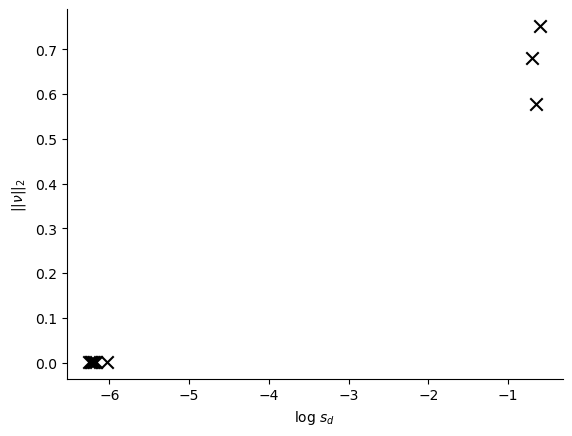

plotting informative and discarded dimensions


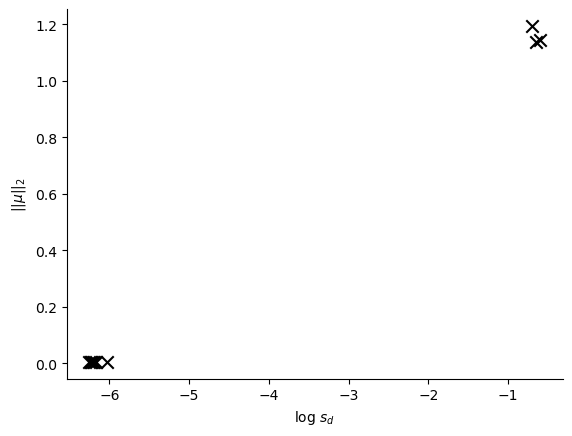

learned timescales (ms): [ 28  51  35 188 167 167 167 167 167 166]
-0.6700589853382761 0.01530882017714571


In [67]:
np.random.seed(0)
torch.manual_seed(0)
inv = lambda x: torch.logaddexp(torch.zeros_like(x), x)
LL, MSE, final_loss, lat_traj2, Ytest2, Ypred2, mod2, mu2 = s.cross_validate(1, nu=None, ret_Y=True, lrate=5e-2, max_steps=2001, rho=.1, prior_ell_factor=0.8, likelihood_kwargs={'inv_link': inv, 'd': torch.ones(s.N,)*0, 'fixed_c': True, 'fixed_d': False}, prior_fourier_func=None)
print(LL, MSE)

In [68]:
mu = mu.detach().cpu().numpy()
mu2 = mu2.detach().cpu().numpy()

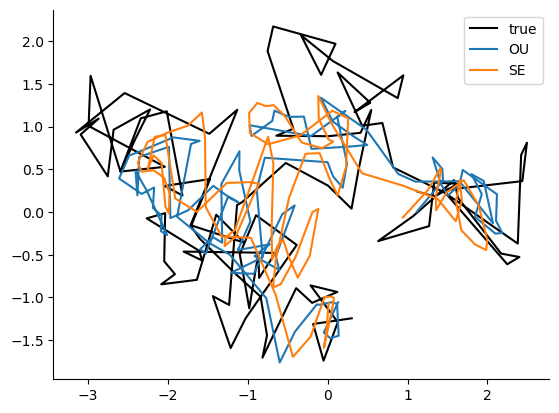

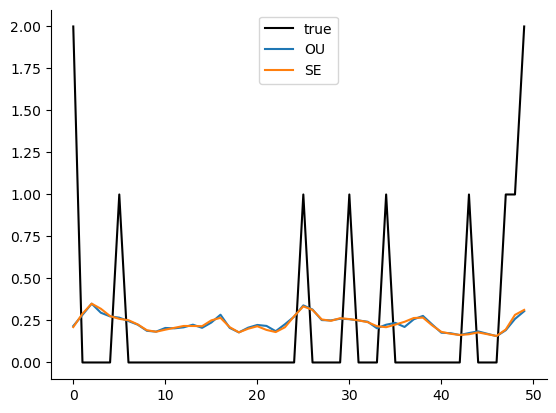

(1, 1, 200, 1000)


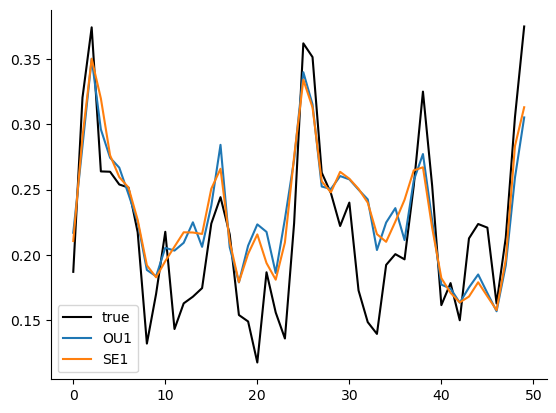

(1, 200, 2000)
0.13288739259831786
0.12982174829829568
0.0017770635705900075
0.00175456758185666


In [69]:
_data_ind = 1
true_traj = s.get_lat_traj(_data_ind)
lim = 100
plt.plot(true_traj[:lim,0], true_traj[:lim,1], 'k-', label='true')
plt.plot(lat_traj[:lim,0], lat_traj[:lim,1], label='OU')
plt.plot(lat_traj2[:lim,0], lat_traj2[:lim,1], label='SE')
plt.legend()
plt.show()

lim = 50
start = s.T // 2
plt.plot(Ytest[0,0,:lim], 'k-', label='true')
plt.plot(Ypred[0,0,:lim], label='OU')
plt.plot(Ypred2[0,0,:lim], label='SE')
plt.legend()
plt.show()
print(mu.shape)

plt.plot(s.Fs[_data_ind][0,0,start:lim+start], 'k-', label='true')
# plt.plot(mu[0,0,0,:lim], label='OU')
# plt.plot(mu2[0,0,0,:lim], label='SE')
plt.plot(Ypred[0,0,:lim], label='OU1')
plt.plot(Ypred2[0,0,:lim], label='SE1')
plt.legend()
plt.show()

# MSE between true and predicted firing rates, s.Fs[1][0,0,:] and mu[0,0,0,:]
print(s.Fs[_data_ind].shape)
print(np.mean((s.Fs[_data_ind][0,s.N//2:,start:lim+start] - Ypred[0,:,:lim])**2))
print(np.mean((s.Fs[_data_ind][0,s.N//2:,start:lim+start] - Ypred2[0,:,:lim])**2))

# first neuron
print(np.mean((s.Fs[_data_ind][0,0,start:lim+start] - Ypred[0,0,:lim])**2))
print(np.mean((s.Fs[_data_ind][0,0,start:lim+start] - Ypred2[0,0,:lim])**2))

# # MSe between mu and Ypred
# print(np.mean((mu[0,0,0,:lim] - Ypred[0,0,:lim])**2))
# print(np.mean((mu2[0,0,0,:lim] - Ypred2[0,0,:lim])**2))

In [20]:
# lim = 1000
# torch.cuda.empty_cache() # clear GPU memory
# print('running decoding analysis')
# Ypreds = [] # decode from the inferred firing rates (this is a non-linear decoder from latents)
# query = mod.lat_dist.lat_mu.detach().transpose(-1, -2).to(device)  # (ntrial, d_fit, T)
# for i in range(100): # loop over mc samples to avoid memory issues
#     Ypred3 = mod.svgp.sample(query, n_mc=100, noise=False) # OG n_mc = 100
#     Ypred3 = Ypred3.detach().mean(0).cpu().numpy()  # (ntrial x n x T)
#     Ypreds.append(Ypred3)
# Ypred3 = np.mean(np.array(Ypreds), axis = (0,1)).T # T x n

# Ypreds = [] # decode from the inferred firing rates (this is a non-linear decoder from latents)
# query = mod2.lat_dist.lat_mu.detach().transpose(-1, -2).to(device)  # (ntrial, d_fit, T)
# for i in range(100): # loop over mc samples to avoid memory issues
#     Ypred4 = mod2.svgp.sample(query, n_mc=100, noise=True) # OG n_mc = 100
#     Ypred4 = Ypred4.detach().mean(0).cpu().numpy()  # (ntrial x n x T)
#     Ypreds.append(Ypred4)
# Ypred4 = np.mean(np.array(Ypreds), axis = (0,1)).T # T x n

# plt.plot(Ytest[0,0,:lim], label='true')
# # plt.plot(Ypred[0,0,:lim], label='OU1')
# # plt.plot(Ypred2[0,0,:lim], label='SE1')
# plt.plot(Ypred3[250:lim, 0], label='OU2')
# plt.plot(Ypred4[250:lim, 0], label='SE2')
# plt.legend()
# plt.show()

In [21]:
# np.random.seed(0)
# torch.manual_seed(0)
# LL, MSE, final_loss = s.cross_validate(0, lrate=7.5e-2, max_steps=2001, rho=.1, likelihood_kwargs={'inv_link': mgp.utils.softplus, 'd': torch.ones(s.N,)*s.d, 'fixed_c': False, 'fixed_d': False}, prior_fourier_func=mgp.rdist.prior_kernels.k_1_2_squared_exponential)
# print(LL, MSE)

In [22]:
# np.random.seed(0)
# torch.manual_seed(0)
# LL, MSE = s.cross_validate(2, lrate=5e-2, max_steps=2001)
# print(LL, MSE)

In [23]:
# # train(Y)
# # s.train(0, lrate=5e-4, max_steps=2001)

# np.random.seed(0)
# torch.manual_seed(0)
# s.train(0, lrate=5e-2, rho=1.0, max_steps=2001)

In [24]:
# s.train(1)

In [25]:
# train(Y_matern_3_2)

# s.train(2)

In [26]:
a = 5
A = np.random.multivariate_normal(mean=np.zeros(a), cov=np.eye(a), size=(1,3))
A.shape
# np.matmul(np.eye(3), A) - A

(1, 3, 5)

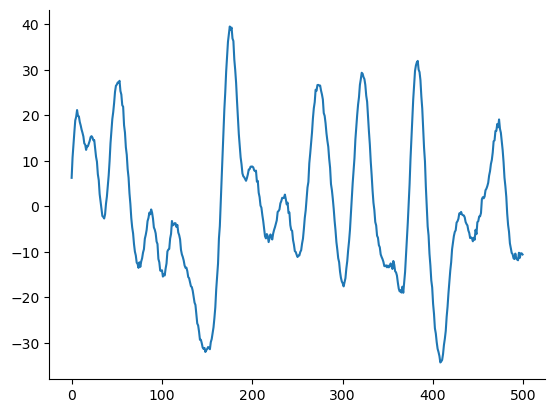

In [27]:
plt.plot(Y[0][0].T/s.dt)

In [28]:
LLs = [-0.5538973454614776, -0.5390096259464041, -0.531656126510962]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.5605438731500665, -0.5432762162307418, -0.5347691183639025]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.5564626032453621, -0.5395919225190744, -0.5326139108233836]
print(np.mean(LLs), np.std(LLs))

LLs = [-0.5744908034390783, -0.5633569559135733, -0.5645305601832007]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.5719735834696904, -0.5626772672463167, -0.5645240697165489]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.573396835987321, -0.562422460540293, -0.5637905972721071]
print(np.mean(LLs), np.std(LLs))

LLs = [-0.5727812144400262, -0.5672684796841132, -0.5511892584879634]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.5720889940132176, -0.5694465317490157, -0.5535713211858878]
print(np.mean(LLs), np.std(LLs))
LLs = [-0.5705105825953768, -0.568482819003373, -0.5510203162193353]
print(np.mean(LLs), np.std(LLs))

-0.5415210326396146 0.009251966557989029
-0.5461964025815703 0.010723187098196574
-0.5428894788626067 0.010011508076162867
-0.5674594398452841 0.00499495693918864
-0.5663916401441854 0.004018394232184194
-0.5665366312665737 0.004882946933779351
-0.5637463175373676 0.00915996215785234
-0.5650356156493737 0.008177945437315638
-0.5633379059393618 0.00874910352281645


In [29]:
r2 = [0.6130015878226106, 0.6173686453684561, 0.609655822147173, 0.6102024184953458, 0.6019821349031547] # OU
print(np.mean(r2), np.std(r2))

r2 = [0.6118906586093659, 0.6171928631666733, 0.5989873969428202, 0.6221955566037611, 0.6440074287114887] # SE
print(np.mean(r2), np.std(r2))

r2 = [0.6148534183517933, 0.6174452788791237, 0.6160725489387684, 0.6116605676337639, 0.6073986782440395] # M_3_2
print(np.mean(r2), np.std(r2))

0.6104421217473481 0.005035368867885837
0.6188547808068219 0.01476340332961806
0.6134860984094977 0.0035950979691799956


In [30]:
# # Unpickle the first file
# with open('models/mse/data_0_kernel_0_seed_0model.pickled', 'rb') as file:
#     mod1 = pickle.load(file)

# # Unpickle the second file
# with open('models/mse/data_0_kernel_1_seed_0model.pickled', 'rb') as file:
#     mod2 = pickle.load(file)

# xs = s.Xs[0][0].T # true latents
# print(np.shape(xs))
# xs = xs - np.mean(xs, axis = 0, keepdims = True) # mean subtract
# ### plot latents ####
# lim = 100
# plt.figure()
# plt.plot(xs[:lim, 0], xs[:lim, 1], 'k-', label='true') # plot true latents
# mods = [mod1, mod2] # models to plot
# for i, mod in enumerate(mods):
#     lats = mods[i].lat_dist.lat_mu.detach().cpu().numpy()[0, ...] # extract model latents
#     dim_scales = mods[i].obs.dim_scale.detach().cpu().numpy().flatten() # latent scales
#     inds = np.argsort(-dim_scales)[:2] # pick the two most informative dimensions
#     lats = lats[..., inds] # extract corresponding latents
#     lats = lats - np.mean(lats, axis = 0, keepdims = True) # mean subtract

#     #fit xs = mus @ T --> T = (mus' * mus)^(-1) * mus' * xs
#     T = np.linalg.inv(lats.T @ lats) @ lats.T @ xs # linear regression
#     lats = lats @ T  #predicted values

#     plt.plot(lats[:lim, 0], lats[:lim, 1], label='{}'.format(i)) # plot inferred latents

# plt.legend()
# plt.show()
# plt.close()
